In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import pingouin
from scipy.stats import mannwhitneyu # Mann-Whitney 

In [113]:
women = pd.read_csv("women_results.csv")
men = pd.read_csv("men_results.csv")

In [114]:
# copy()
men_subset = men[(men["date"] > "2002-01-01") & (men["tournament"].isin(["FIFA World Cup"]))].copy()
women_subset = women[(women["date"] > "2002-01-01") & (women["tournament"].isin(["FIFA World Cup"]))].copy()

In [115]:
# .loc[]
men_subset.loc[:, "group"] = "men"
women_subset.loc[:, "group"] = "women"

men_subset.loc[:, "goals_scored"] = men_subset["home_score"] + men_subset["away_score"]
women_subset.loc[:, "goals_scored"] = women_subset["home_score"] + women_subset["away_score"]

print(women_subset)
print(men_subset)

      Unnamed: 0        date      home_team      away_team  home_score  \
1600        1600  2003-09-20        Nigeria    North Korea           0   
1601        1601  2003-09-20         Norway         France           2   
1602        1602  2003-09-20        Germany         Canada           4   
1603        1603  2003-09-20          Japan      Argentina           6   
1604        1604  2003-09-21  United States         Sweden           3   
...          ...         ...            ...            ...         ...   
4465        4465  2019-06-29        Germany         Sweden           1   
4466        4466  2019-07-02        England  United States           1   
4467        4467  2019-07-03    Netherlands         Sweden           1   
4468        4468  2019-07-06        England         Sweden           1   
4469        4469  2019-07-07  United States    Netherlands           2   

      away_score      tournament  group  goals_scored  
1600           3  FIFA World Cup  women             3  

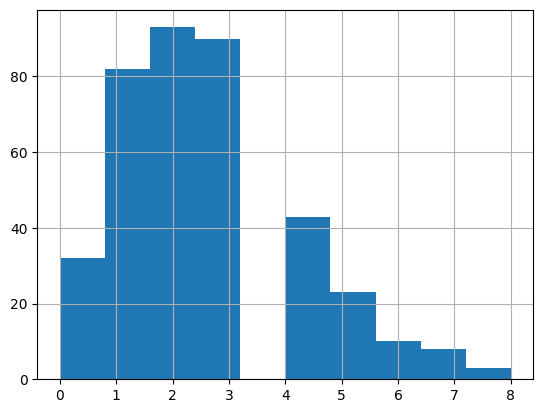

<Figure size 640x480 with 0 Axes>

In [116]:
men_subset["goals_scored"].hist()
#plt.scatter(men_subset.index, men_subset["goals_scored"])
plt.show()
#plt.plot(x, y1, label='title')
#plt.legend()
plt.clf()

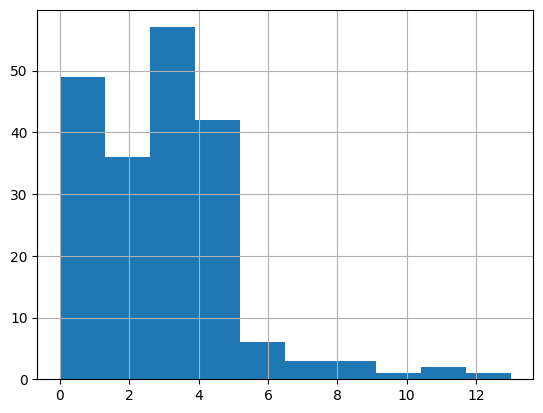

<Figure size 640x480 with 0 Axes>

In [117]:
women_subset["goals_scored"].hist()
plt.show()
plt.clf()

In [118]:
both = pd.concat([women_subset, men_subset], axis=0, ignore_index=True)
print(both)

     Unnamed: 0        date      home_team    away_team  home_score  \
0          1600  2003-09-20        Nigeria  North Korea           0   
1          1601  2003-09-20         Norway       France           2   
2          1602  2003-09-20        Germany       Canada           4   
3          1603  2003-09-20          Japan    Argentina           6   
4          1604  2003-09-21  United States       Sweden           3   
..          ...         ...            ...          ...         ...   
579       44343  2022-12-10        England       France           1   
580       44345  2022-12-13      Argentina      Croatia           3   
581       44346  2022-12-14         France      Morocco           2   
582       44350  2022-12-17        Croatia      Morocco           2   
583       44352  2022-12-18      Argentina       France           3   

     away_score      tournament  group  goals_scored  
0             3  FIFA World Cup  women             3  
1             0  FIFA World Cup  wome

In [119]:
both_subset = both[["goals_scored", "group"]]
print(both_subset)

     goals_scored  group
0               3  women
1               2  women
2               5  women
3               6  women
4               4  women
..            ...    ...
579             3    men
580             3    men
581             2    men
582             3    men
583             6    men

[584 rows x 2 columns]


In [120]:
both_subset_wide = both_subset.pivot(columns="group", values="goals_scored")
print(both_subset_wide)

group  men  women
0      NaN    3.0
1      NaN    2.0
2      NaN    5.0
3      NaN    6.0
4      NaN    4.0
..     ...    ...
579    3.0    NaN
580    3.0    NaN
581    2.0    NaN
582    3.0    NaN
583    6.0    NaN

[584 rows x 2 columns]


In [121]:
results_pg = pingouin.mwu(x=both_subset_wide["women"], y=both_subset_wide["men"], alternative="greater")

results_scipy = mannwhitneyu(x=women_subset["goals_scored"],y=men_subset["goals_scored"],alternative="greater")

p_val = results_pg["p-val"].values[0]
print(results_pg)

       U-val alternative     p-val       RBC      CLES
MWU  43273.0     greater  0.005107 -0.126901  0.563451


In [122]:
if p_val <= 0.10:
    result = "reject"
else:
    result = "fail to reject"

result_dict = {"p_val": p_val, "result": result}
print(result_dict)

{'p_val': 0.005106609825443641, 'result': 'reject'}
